In [1]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from typing import Tuple
import json

sns.set_style("whitegrid")
sns.set_context("poster", font_scale=0.75)
sns.set_palette("colorblind")

def load_df(p: Path) -> pd.DataFrame:
    data = pd.read_csv(p)
    times = data["IterTime"]
    t_sum = 0.0
    for i in range(0, len(times)):
        t_sum += times[i]
        times[i] = t_sum
    data["Bandwidth"] /= 1000.0
    return data

def load_ftq(p: Path) -> pd.DataFrame:
    data = pd.read_csv(p)
    return data

Text(0.5, 1.0, 'Baseline for buddy kernel')

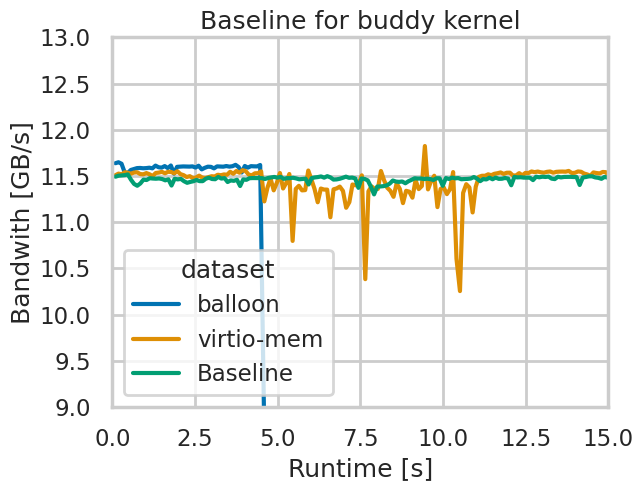

In [2]:
baseline = load_df(Path("stream/240327-155018/Triad.csv"))
balloon = load_df(Path("stream/240327-155219/Triad.csv"))
virtio_mem = load_df(Path("stream/240328-152639/Triad.csv"))
concat = pd.concat([balloon.assign(dataset="balloon"), virtio_mem.assign(dataset="virtio-mem"), baseline.assign(dataset="Baseline")])
plot = sns.lineplot(x="IterTime", y="Bandwidth", data=concat, hue="dataset")
plot.set_ylim(9.0, 13.0)
plot.set_xlim(0.0, 15.0)
plot.set_ylabel("Bandwith [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("Baseline for buddy kernel")

Text(0.5, 1.0, 'Baseline for llfree kernel')

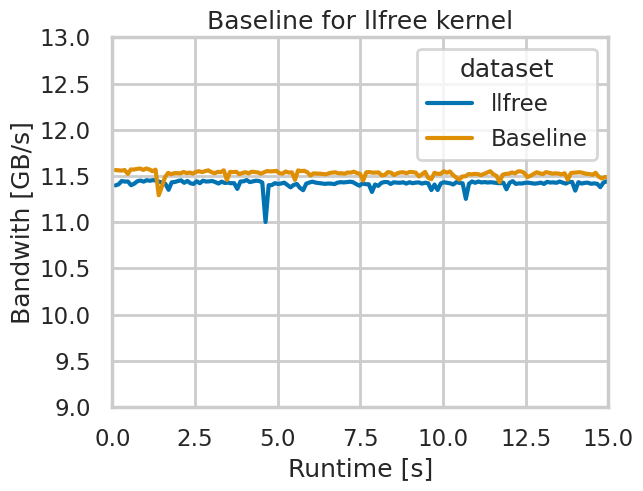

In [3]:
baseline = load_df(Path("stream/240327-154753/Triad.csv"))
llfree = load_df(Path("stream/240327-155419/Triad.csv"))
concat = pd.concat([llfree.assign(dataset="llfree"), baseline.assign(dataset="Baseline")])
plot = sns.lineplot(x="IterTime", y="Bandwidth", data=concat, hue="dataset")
plot.set_ylim(9.0, 13.0)
plot.set_xlim(0.0, 15.0)
plot.set_ylabel("Bandwith [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("Baseline for llfree kernel")

Text(0.5, 1.0, 'STREAM with one thread')

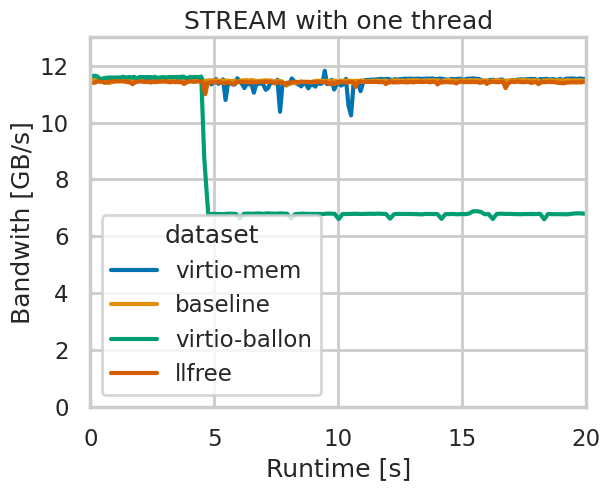

In [4]:
baseline = load_df(Path("stream/240327-155018/Triad.csv"))
virtio_balloon = load_df(Path("stream/240327-155219/Triad.csv"))
virtio_mem = load_df(Path("stream/240328-152639/Triad.csv"))
llfree = load_df(Path("stream/240327-155419/Triad.csv"))
concat = pd.concat([virtio_mem.assign(dataset="virtio-mem"), baseline.assign(dataset="baseline"), virtio_balloon.assign(dataset="virtio-ballon"), llfree.assign(dataset="llfree")])
plot = sns.lineplot(x="IterTime", y="Bandwidth", data=concat, hue="dataset")
plot.set_ylim(0.0, 13.0)
plot.set_xlim(0.0, 20)
plot.set_ylabel("Bandwith [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("STREAM with one thread")

Text(0.5, 1.0, 'STREAM with 10 threads')

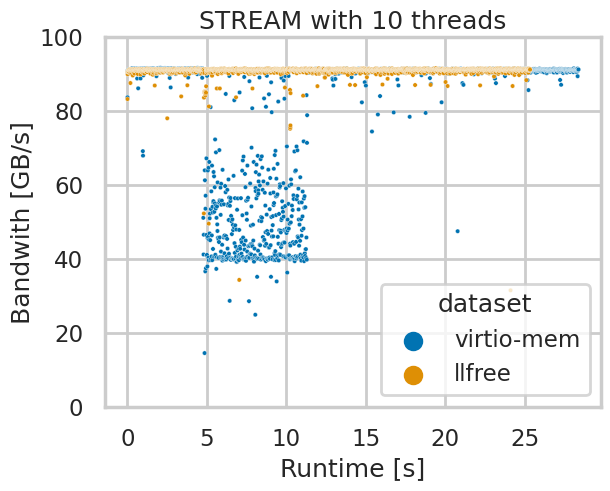

In [5]:
#llfree = load_df(Path("stream/240402-122757/Copy.csv"))
virtiomem = load_df(Path("stream/240402-142029/Copy.csv"))
#rand = load_df(Path("stream/240402-131920/Copy.csv"))
#rand = load_df(Path("stream/240402-130818/Triad.csv"))
llfree = load_df(Path("stream/240402-142627/Copy.csv"))
concat = pd.concat([virtiomem.assign(dataset="virtio-mem"), llfree.assign(dataset="llfree")])
plot = sns.scatterplot(x="IterTime", y="Bandwidth", data=concat, hue="dataset", s=10.0)
#plot = sns.lineplot(x="IterTime", y="Bandwidth", data=concat, hue="dataset")
plot.set_ylim(0, 100)
plot.set_ylabel("Bandwith [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("STREAM with 10 threads")

Text(0.5, 1.0, 'STREAM with one thread')

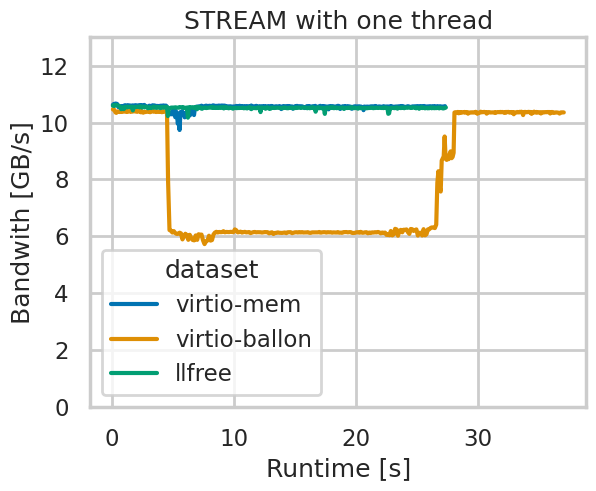

In [6]:
#baseline = load_df(Path("stream/240327-155018/Triad.csv"))
virtio_balloon = load_df(Path("stream/240405-123249/Copy.csv"))
virtio_mem = load_df(Path("stream/240405-124222/Copy.csv"))
llfree = load_df(Path("stream/240405-130614/Copy.csv"))
concat = pd.concat([virtio_mem.assign(dataset="virtio-mem"), virtio_balloon.assign(dataset="virtio-ballon"), llfree.assign(dataset="llfree")])
plot = sns.lineplot(x="IterTime", y="Bandwidth", data=concat, hue="dataset")
plot.set_ylim(0.0, 13.0)
#plot.set_xlim(0.0, 20)
plot.set_ylabel("Bandwith [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("STREAM with one thread")

Text(0.5, 1.0, 'virtio-mem')

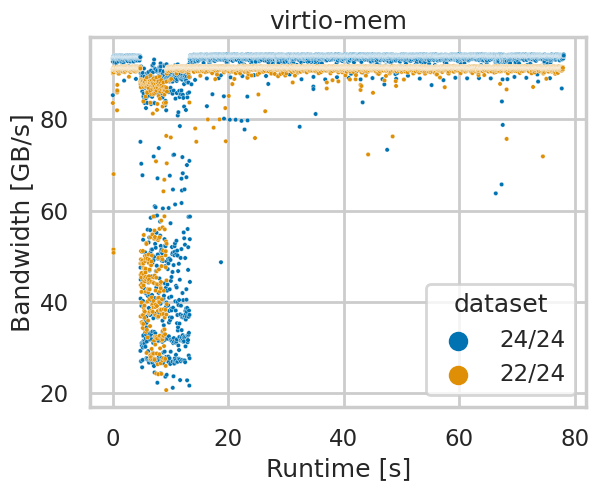

In [7]:
#llfree = load_df(Path("stream/240402-122757/Copy.csv"))
virtiomem = load_df(Path("stream/240405-132948/Copy.csv"))
virtiomem = load_df(Path("stream/240405-143631/Copy.csv"))
virtiomem = load_df(Path("stream/240405-154045/Copy.csv"))
#rand = load_df(Path("stream/240402-131920/Copy.csv"))
#rand = load_df(Path("stream/240402-130818/Triad.csv"))
#llfree = load_df(Path("stream/240402-142627/Copy.csv"))
llfree = load_df(Path("stream/240405-140525/Copy.csv"))
llfree = load_df(Path("stream/240405-154634/Copy.csv"))
concat = pd.concat([virtiomem.assign(dataset="24/24"), llfree.assign(dataset="22/24")])
plot = sns.scatterplot(x="IterTime", y="Bandwidth", data=concat, hue="dataset", s=10.0)
#plot = sns.lineplot(x="IterTime", y="Bandwidth", data=concat, hue="dataset")
#plot.set_ylim(0, 60)
#plot.set_xlim(0, 40)
plot.set_ylabel("Bandwidth [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("virtio-mem")

Text(0.5, 1.0, 'virtio-mem')

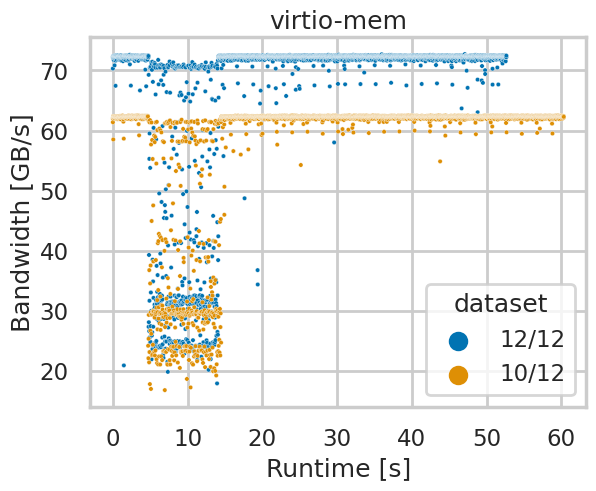

In [8]:

virtiomem = load_df(Path("stream/240405-161835/Copy.csv"))
llfree = load_df(Path("stream/240405-162040/Copy.csv"))
concat = pd.concat([virtiomem.assign(dataset="12/12"), llfree.assign(dataset="10/12")])
plot = sns.scatterplot(x="IterTime", y="Bandwidth", data=concat, hue="dataset", s=10.0)
#plot = sns.lineplot(x="IterTime", y="Bandwidth", data=concat, hue="dataset")
#plot.set_ylim(0, 60)
#plot.set_xlim(0, 40)
plot.set_ylabel("Bandwidth [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("virtio-mem")

Text(0.5, 1.0, 'STREAM 1/12')

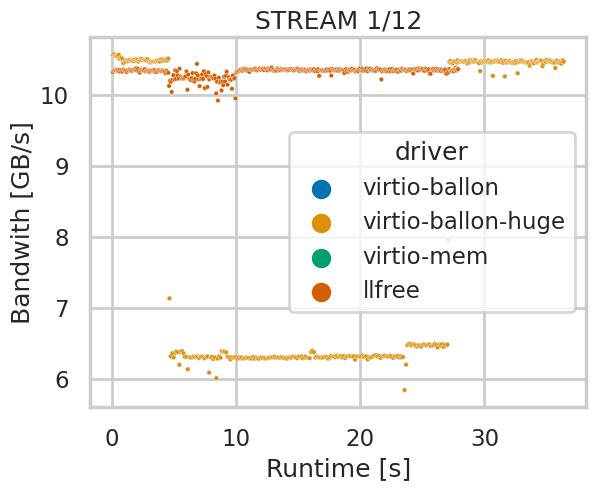

In [9]:
virtio_balloon = load_df(Path("stream/240408-112822-virtio-balloon/1/Copy.csv"))
virtio_balloon_huge = load_df(Path("stream/240408-112822-virtio-balloon/1/Copy.csv"))
virtio_mem = load_df(Path("stream/240408-113708-virtio-mem/1/Copy.csv"))
llfree = load_df(Path("stream/240408-113708-virtio-mem/1/Copy.csv"))
concat = pd.concat([virtio_balloon.assign(driver="virtio-ballon"), virtio_balloon_huge.assign(driver="virtio-ballon-huge"), virtio_mem.assign(driver="virtio-mem"), llfree.assign(driver="llfree")])
plot = sns.scatterplot(x="IterTime", y="Bandwidth", data=concat, hue="driver", s=10.0)
#plot.set_ylim(0.0, 13.0)
#plot.set_xlim(0.0, 20)
plot.set_ylabel("Bandwith [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("STREAM 1/12")

Text(0.5, 1.0, 'STREAM 4/12')

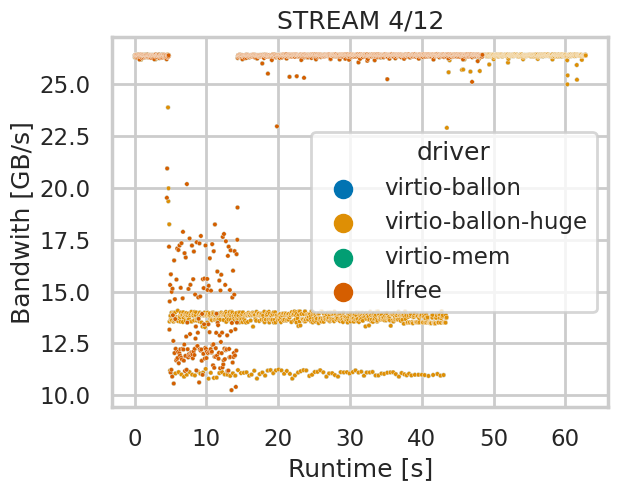

In [10]:
virtio_balloon = load_df(Path("stream/240408-112822-virtio-balloon/4/Copy.csv"))
virtio_balloon_huge = load_df(Path("stream/240408-112822-virtio-balloon/4/Copy.csv"))
virtio_mem = load_df(Path("stream/240408-113708-virtio-mem/4/Copy.csv"))
llfree = load_df(Path("stream/240408-113708-virtio-mem/4/Copy.csv"))
concat = pd.concat([virtio_balloon.assign(driver="virtio-ballon"), virtio_balloon_huge.assign(driver="virtio-ballon-huge"), virtio_mem.assign(driver="virtio-mem"), llfree.assign(driver="llfree")])
plot = sns.scatterplot(x="IterTime", y="Bandwidth", data=concat, hue="driver", s=10.0)
#plot.set_ylim(0.0, 13.0)
#plot.set_xlim(0.0, 20)
plot.set_ylabel("Bandwith [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("STREAM 4/12")

Text(0.5, 1.0, 'STREAM 8/12')

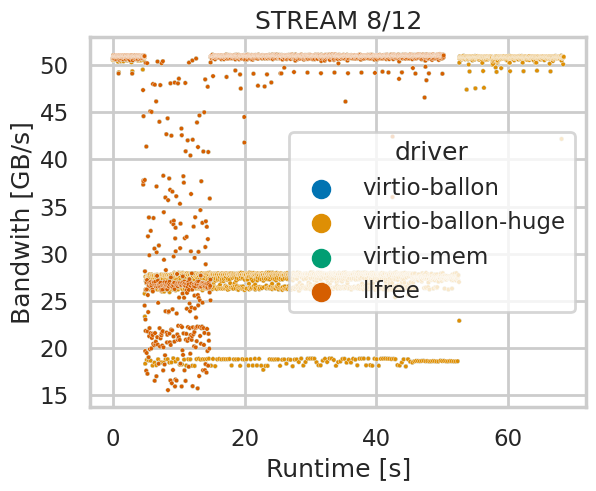

In [11]:
virtio_balloon = load_df(Path("stream/240408-112822-virtio-balloon/8/Copy.csv"))
virtio_balloon_huge = load_df(Path("stream/240408-112822-virtio-balloon/8/Copy.csv"))
virtio_mem = load_df(Path("stream/240408-113708-virtio-mem/8/Copy.csv"))
llfree = load_df(Path("stream/240408-113708-virtio-mem/8/Copy.csv"))
concat = pd.concat([virtio_balloon.assign(driver="virtio-ballon"), virtio_balloon_huge.assign(driver="virtio-ballon-huge"), virtio_mem.assign(driver="virtio-mem"), llfree.assign(driver="llfree")])
plot = sns.scatterplot(x="IterTime", y="Bandwidth", data=concat, hue="driver", s=10.0)
#plot.set_ylim(0.0, 13.0)
#plot.set_xlim(0.0, 20)
plot.set_ylabel("Bandwith [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("STREAM 8/12")

Text(0.5, 1.0, 'STREAM 10/12')

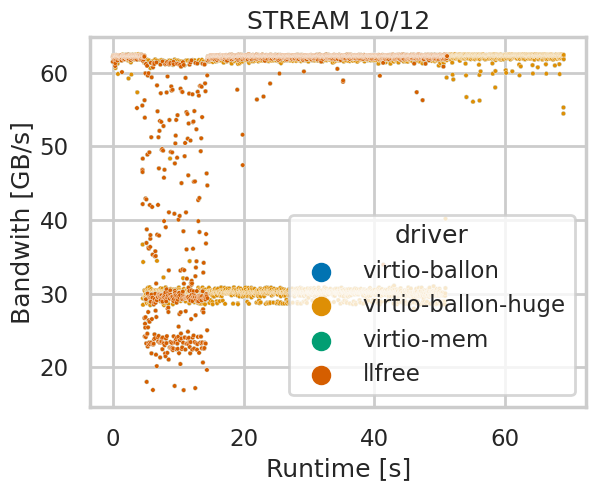

In [12]:
virtio_balloon = load_df(Path("stream/240408-112822-virtio-balloon/10/Copy.csv"))
virtio_balloon_huge = load_df(Path("stream/240408-112822-virtio-balloon/10/Copy.csv"))
virtio_mem = load_df(Path("stream/240408-113708-virtio-mem/10/Copy.csv"))
llfree = load_df(Path("stream/240408-113708-virtio-mem/10/Copy.csv"))
concat = pd.concat([virtio_balloon.assign(driver="virtio-ballon"), virtio_balloon_huge.assign(driver="virtio-ballon-huge"), virtio_mem.assign(driver="virtio-mem"), llfree.assign(driver="llfree")])
plot = sns.scatterplot(x="IterTime", y="Bandwidth", data=concat, hue="driver", s=10.0)
#plot.set_ylim(0.0, 13.0)
#plot.set_xlim(0.0, 20)
plot.set_ylabel("Bandwith [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("STREAM 10/12")

Text(0.5, 1.0, 'STREAM 12/12')

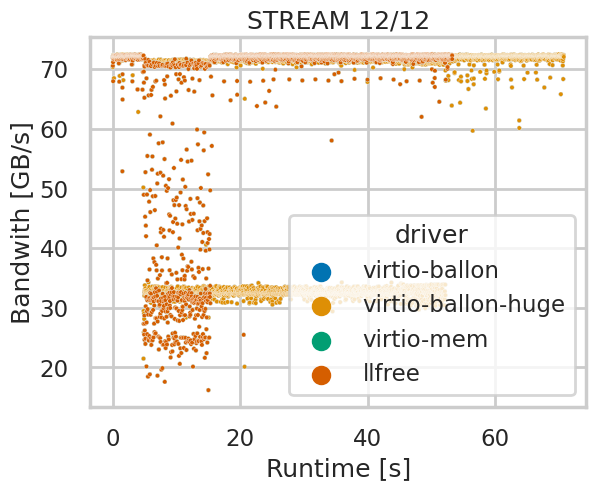

In [13]:
virtio_balloon = load_df(Path("stream/240408-112822-virtio-balloon/12/Copy.csv"))
virtio_balloon_huge = load_df(Path("stream/240408-112822-virtio-balloon/12/Copy.csv"))
virtio_mem = load_df(Path("stream/240408-113708-virtio-mem/12/Copy.csv"))
llfree = load_df(Path("stream/240408-113708-virtio-mem/12/Copy.csv"))
concat = pd.concat([virtio_balloon.assign(driver="virtio-ballon"), virtio_balloon_huge.assign(driver="virtio-ballon-huge"), virtio_mem.assign(driver="virtio-mem"), llfree.assign(driver="llfree")])
plot = sns.scatterplot(x="IterTime", y="Bandwidth", data=concat, hue="driver", s=10.0)
#plot.set_ylim(0.0, 13.0)
#plot.set_xlim(0.0, 20)
plot.set_ylabel("Bandwith [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("STREAM 12/12")

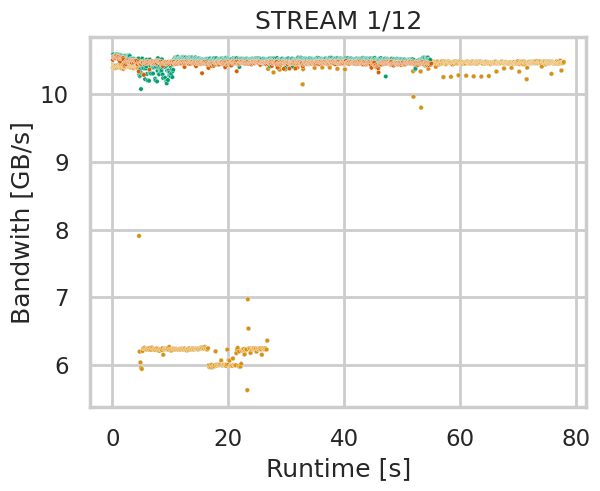

In [20]:
virtio_balloon = load_df(Path("stream/240411-090817-virtio-balloon/1/Copy.csv"))
virtio_balloon_huge = load_df(Path("stream/240411-090817-virtio-balloon/1/Copy.csv"))
virtio_mem = load_df(Path("stream/240410-143709-virtio-mem/1/Copy.csv"))
llfree = load_df(Path("stream/240410-150707-llfree/1/Copy.csv"))
concat = pd.concat([virtio_balloon.assign(driver="virtio-ballon"), virtio_balloon_huge.assign(driver="virtio-ballon-huge"), virtio_mem.assign(driver="virtio-mem"), llfree.assign(driver="llfree")])
plot = sns.scatterplot(x="IterTime", y="Bandwidth", data=concat, hue="driver", s=10.0)
#plot.set_ylim(0.0, 13.0)
#plot.set_xlim(0.0, 20)
plot.set_ylabel("Bandwith [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("STREAM 1/12")
plot.get_legend().set_visible(False)

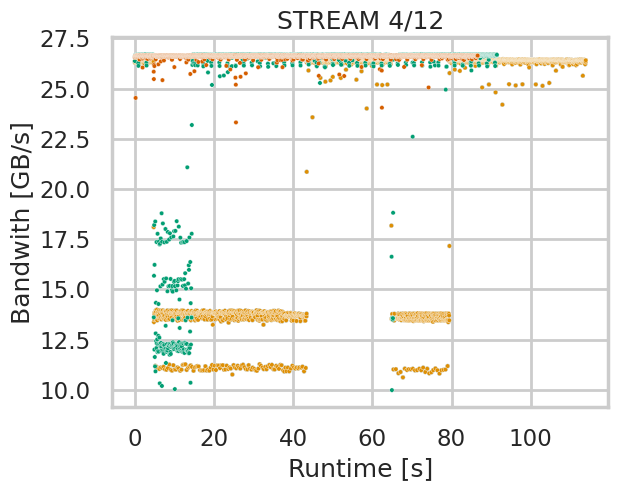

In [15]:
virtio_balloon = load_df(Path("stream/240410-142417-virtio-balloon/4/Copy.csv"))
virtio_balloon_huge = load_df(Path("stream/240410-142417-virtio-balloon/4/Copy.csv"))
virtio_mem = load_df(Path("stream/240410-143709-virtio-mem/4/Copy.csv"))
llfree = load_df(Path("stream/240410-150707-llfree/4/Copy.csv"))
concat = pd.concat([virtio_balloon.assign(driver="virtio-ballon"), virtio_balloon_huge.assign(driver="virtio-ballon-huge"), virtio_mem.assign(driver="virtio-mem"), llfree.assign(driver="llfree")])
plot = sns.scatterplot(x="IterTime", y="Bandwidth", data=concat, hue="driver", s=10.0)
#plot.set_ylim(0.0, 13.0)
#plot.set_xlim(0.0, 20)
plot.set_ylabel("Bandwith [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("STREAM 4/12")
plot.get_legend().set_visible(False)

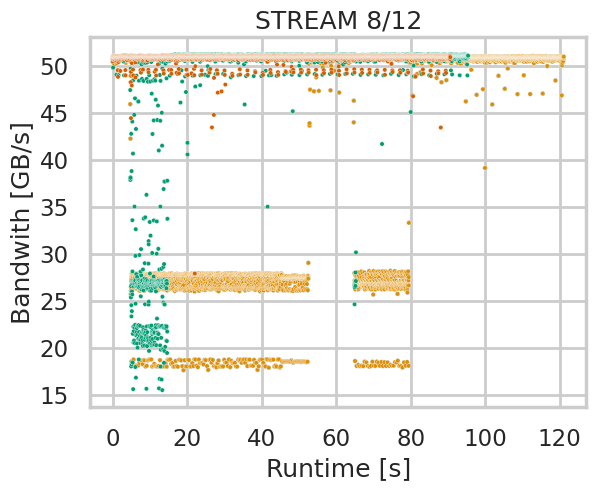

In [16]:
virtio_balloon = load_df(Path("stream/240410-142417-virtio-balloon/8/Copy.csv"))
virtio_balloon_huge = load_df(Path("stream/240410-142417-virtio-balloon/8/Copy.csv"))
virtio_mem = load_df(Path("stream/240410-143709-virtio-mem/8/Copy.csv"))
llfree = load_df(Path("stream/240410-150707-llfree/8/Copy.csv"))
concat = pd.concat([virtio_balloon.assign(driver="virtio-ballon"), virtio_balloon_huge.assign(driver="virtio-ballon-huge"), virtio_mem.assign(driver="virtio-mem"), llfree.assign(driver="llfree")])
plot = sns.scatterplot(x="IterTime", y="Bandwidth", data=concat, hue="driver", s=10.0)
#plot.set_ylim(0.0, 13.0)
#plot.set_xlim(0.0, 20)
plot.set_ylabel("Bandwith [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("STREAM 8/12")
plot.get_legend().set_visible(False)

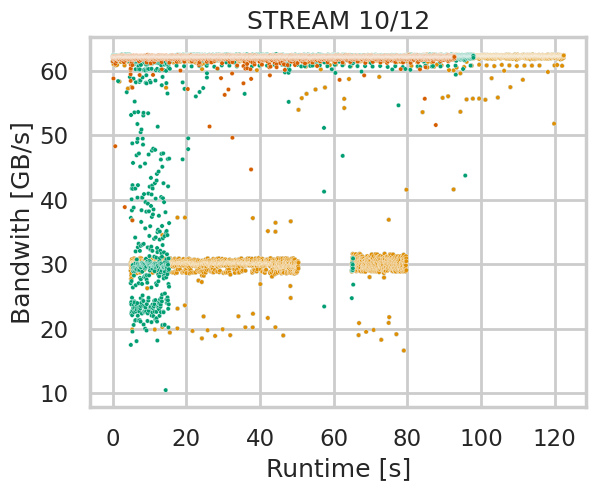

In [17]:
virtio_balloon = load_df(Path("stream/240410-142417-virtio-balloon/10/Copy.csv"))
virtio_balloon_huge = load_df(Path("stream/240410-142417-virtio-balloon/10/Copy.csv"))
virtio_mem = load_df(Path("stream/240410-143709-virtio-mem/10/Copy.csv"))
llfree = load_df(Path("stream/240410-150707-llfree/10/Copy.csv"))
concat = pd.concat([virtio_balloon.assign(driver="virtio-ballon"), virtio_balloon_huge.assign(driver="virtio-ballon-huge"), virtio_mem.assign(driver="virtio-mem"), llfree.assign(driver="llfree")])
plot = sns.scatterplot(x="IterTime", y="Bandwidth", data=concat, hue="driver", s=10.0)
#plot.set_ylim(0.0, 13.0)
#plot.set_xlim(0.0, 20)
plot.set_ylabel("Bandwith [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("STREAM 10/12")
plot.get_legend().set_visible(False)

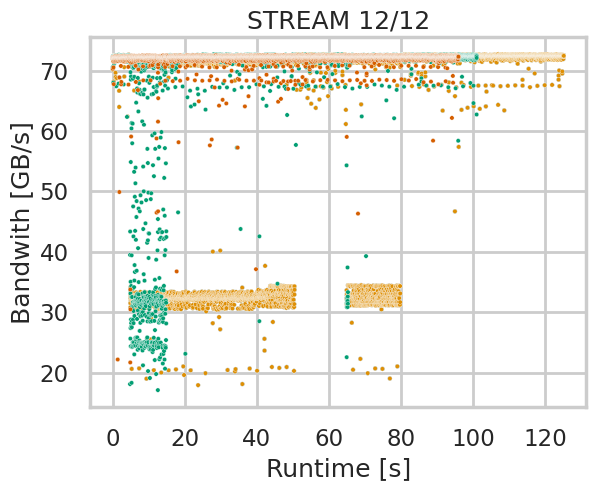

In [18]:
virtio_balloon = load_df(Path("stream/240410-142417-virtio-balloon/12/Copy.csv"))
virtio_balloon_huge = load_df(Path("stream/240410-142417-virtio-balloon/12/Copy.csv"))
virtio_mem = load_df(Path("stream/240410-143709-virtio-mem/12/Copy.csv"))
llfree = load_df(Path("stream/240410-150707-llfree/12/Copy.csv"))
concat = pd.concat([virtio_balloon.assign(driver="virtio-ballon"), virtio_balloon_huge.assign(driver="virtio-ballon-huge"), virtio_mem.assign(driver="virtio-mem"), llfree.assign(driver="llfree")])
plot = sns.scatterplot(x="IterTime", y="Bandwidth", data=concat, hue="driver", s=10.0)
#plot.set_ylim(0.0, 13.0)
#plot.set_xlim(0.0, 20)
plot.set_ylabel("Bandwith [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("STREAM 12/12")
plot.get_legend().set_visible(False)

In [19]:
#virtio_balloon = load_df(Path("stream/240410-142417-virtio-balloon/12/Copy.csv"))
#virtio_balloon_huge = load_df(Path("stream/240410-142417-virtio-balloon/12/Copy.csv"))
virtio_mem = load_ftq(Path("stream/240410-155654-virtio-mem/1/ftq.csv"))
#llfree = load_df(Path("stream/240410-150707-llfree/12/Copy.csv"))
concat = virtio_mem #pd.concat([virtio_balloon.assign(driver="virtio-ballon"), virtio_balloon_huge.assign(driver="virtio-ballon-huge"), virtio_mem.assign(driver="virtio-mem"), llfree.assign(driver="llfree")])
#plot = sns.scatterplot(x="IterTime", y="Bandwidth", data=concat, hue="driver", s=10.0)
print(virtio_mem)
plot = sns.lineplot(x="times", y="counts", data=virtio_mem, s=10.0)
#plot.set_ylim(0.0, 13.0)
#plot.set_xlim(0.0, 20)
plot.set_ylabel("Bandwith [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("STREAM 12/12")
plot.get_legend().set_visible(False)

             times   counts
0     328028127312  9530708
1     328296575132  9530769
2     328564998226  9529682
3     328833433682  9532149
4     329101869142  9531418
...            ...      ...
2395  970931044426  9526470
2396  971199479896  9529389
2397  971467915346  9528596
2398  971736350798  9529460
2399  972004786254  9530412

[2400 rows x 2 columns]


ValueError: Could not interpret value `counts` for parameter `y`